In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv("../data/logfile-network-v3.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,id,type,role,level,bandwidth,total_used_bandwidth,traffic_history,ports,duration,active_duration,power_per_port,low_power,high_power,is_active,Unnamed: 16
0,0,Datacenter_1,0,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"449,True,4.0,113,0,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN
1,0,Datacenter_1,1,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"450,True,4.0,113,1,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN
2,0,Datacenter_1,2,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"451,True,4.0,113,2,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN
3,0,Datacenter_1,3,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"452,True,4.0,113,3,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN
4,0,Datacenter_1,4,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"453,True,4.0,114,4,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN


### Maximum energy consumption of network

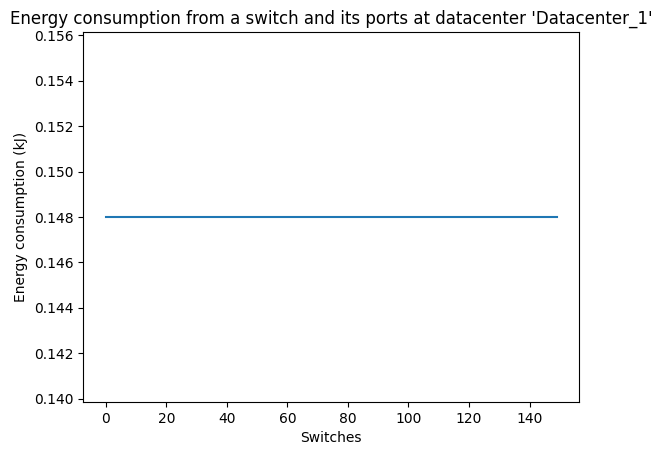

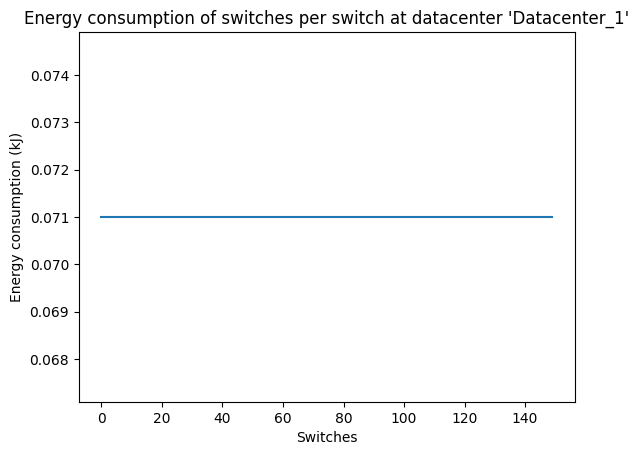

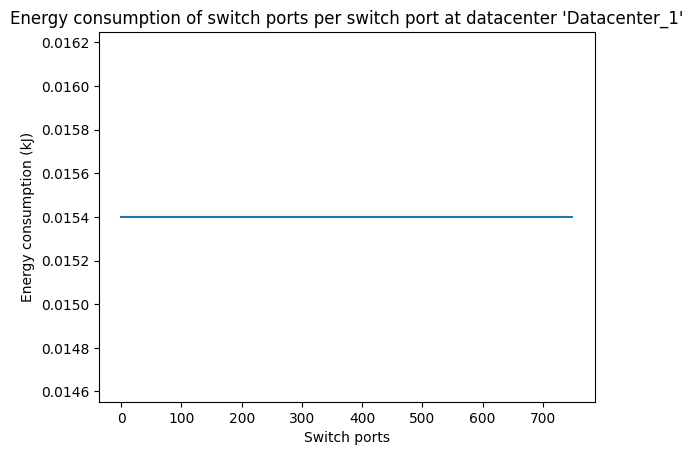

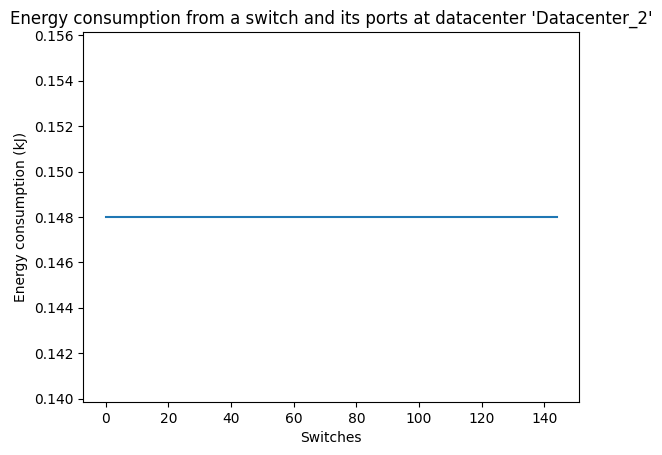

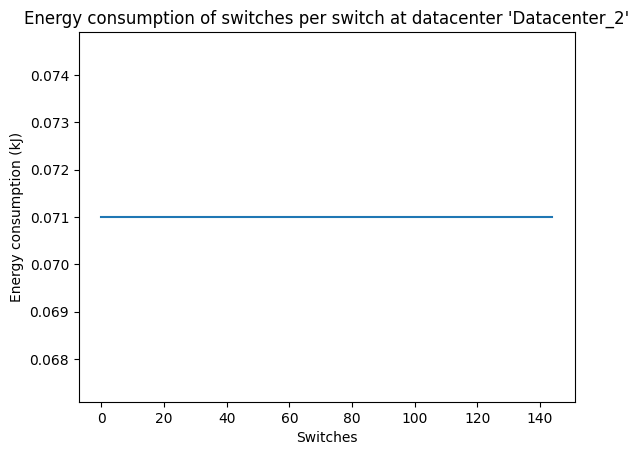

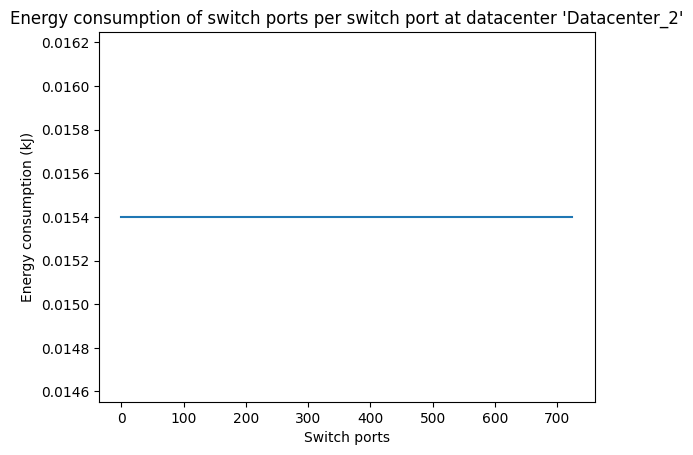

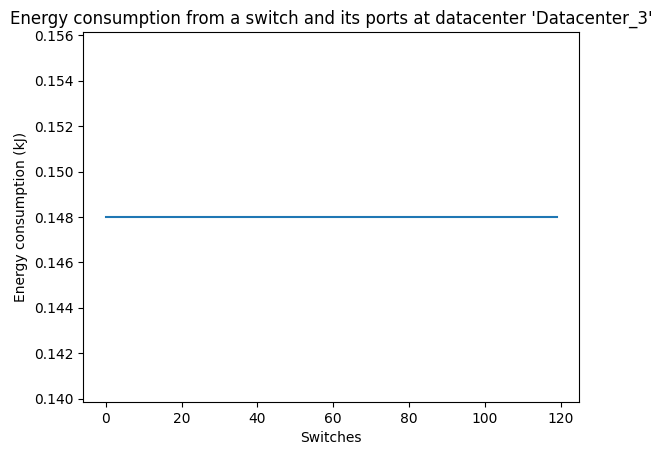

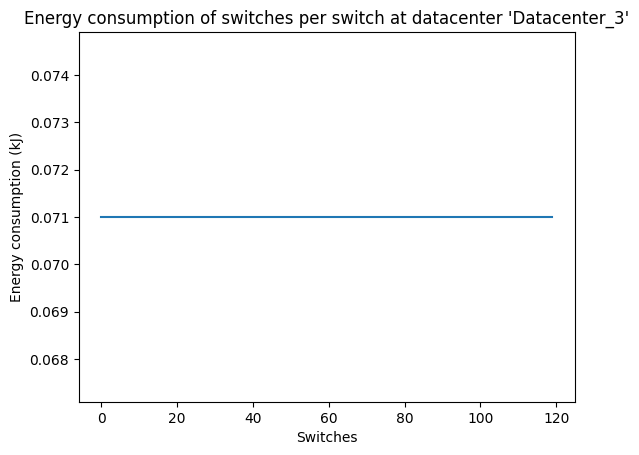

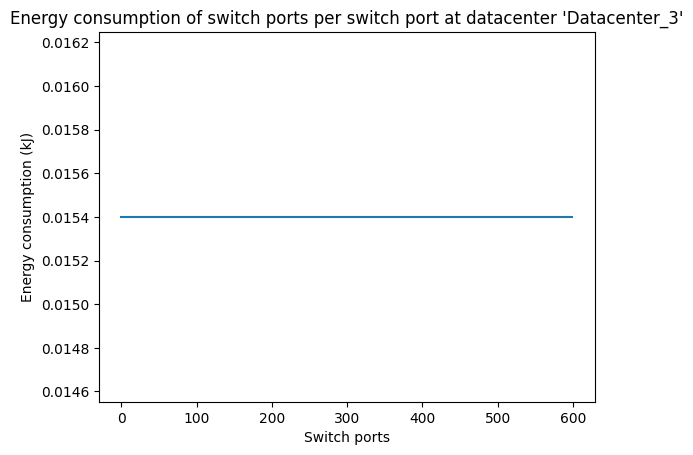

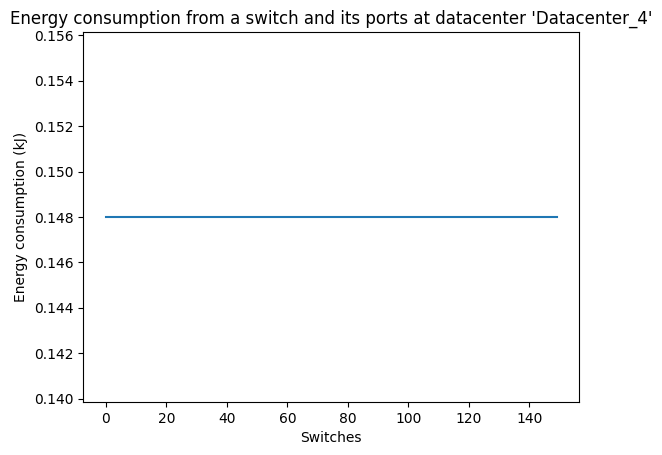

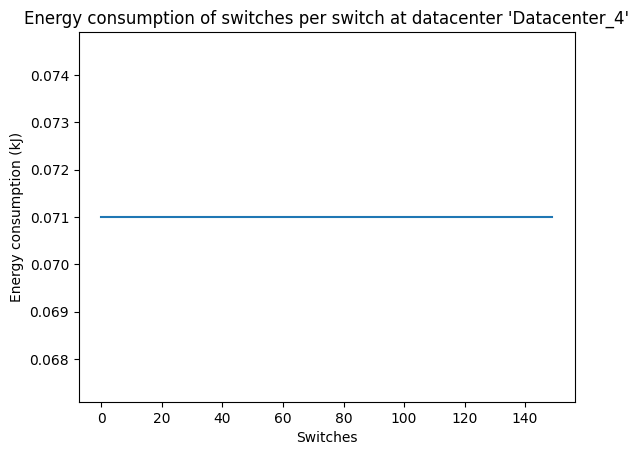

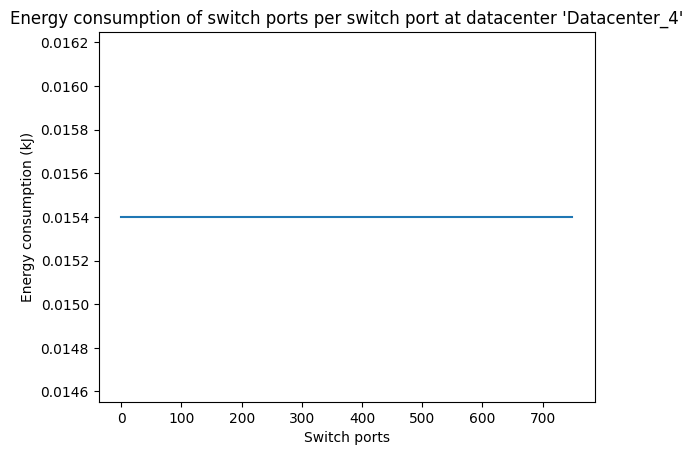

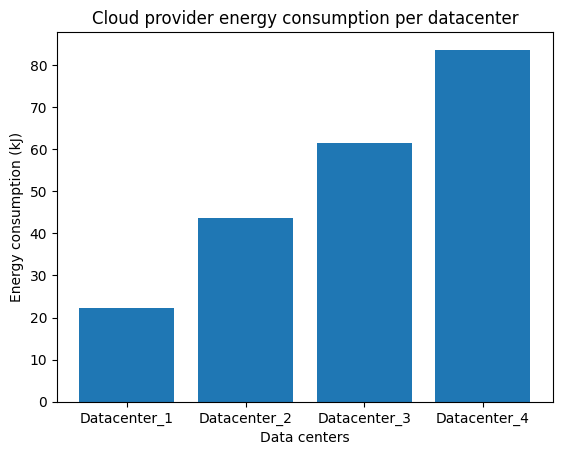

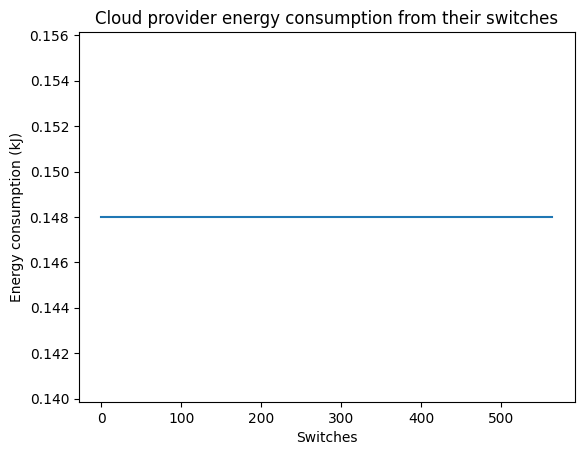

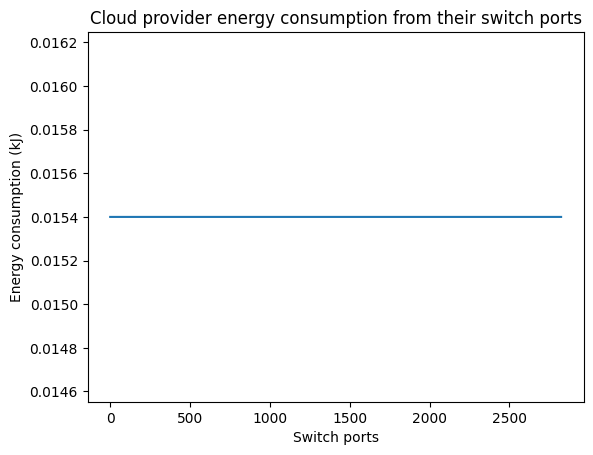

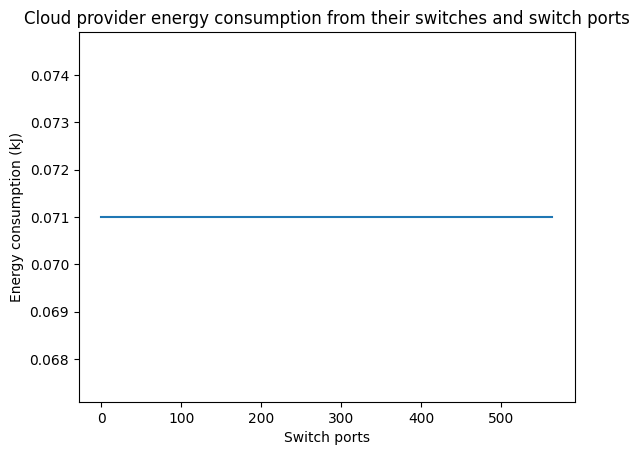

In [9]:
labels = np.unique(dataset['datacenter_name'])

cloud_provider_max_power_consumption_per_switch = np.array([])
cloud_provider_max_power_consumption_per_switch_port = np.array([])
cloud_provider_max_power_consumption_per_switch_combined = np.array([])
cloud_provider_max_power_consumption_per_datacenter = np.array([])
for datacenter_name in labels:
    datacenter_max_power_consumption_per_switch = np.array([])
    datacenter_max_power_consumption_per_switch_port = np.array([])
    datacenter_max_power_consumption_per_switch_combined = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        max_power = 0
        max_switch_power = sample['high_power']
        max_power += max_switch_power
        cloud_provider_max_power_consumption_per_switch = np.append(cloud_provider_max_power_consumption_per_switch, max_power)
        datacenter_max_power_consumption_per_switch = np.append(datacenter_max_power_consumption_per_switch, max_power)
        for port in range(len(sample['ports'].split(":"))-1):
            power_per_port = sample['power_per_port']
            cloud_provider_max_power_consumption_per_switch_port = np.append(cloud_provider_max_power_consumption_per_switch_port, power_per_port)
            datacenter_max_power_consumption_per_switch_port = np.append(datacenter_max_power_consumption_per_switch_port, power_per_port)
            max_power += power_per_port
        cloud_provider_max_power_consumption_per_switch_combined = np.append(cloud_provider_max_power_consumption_per_switch_combined, max_power)
        datacenter_max_power_consumption_per_switch_combined = np.append(datacenter_max_power_consumption_per_switch_combined, max_power)
    cloud_provider_max_power_consumption_per_datacenter = np.append(cloud_provider_max_power_consumption_per_datacenter, np.sum(cloud_provider_max_power_consumption_per_switch_combined))
    
    plt.plot(np.arange(len(datacenter_max_power_consumption_per_switch_combined)), (datacenter_max_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_max_power_consumption_per_switch)), (datacenter_max_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_max_power_consumption_per_switch_port)), (datacenter_max_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_max_power_consumption_per_datacenter)), (cloud_provider_max_power_consumption_per_datacenter / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_max_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_max_power_consumption_per_switch_combined)), (cloud_provider_max_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_max_power_consumption_per_switch_port)), (cloud_provider_max_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_max_power_consumption_per_switch)), (cloud_provider_max_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

### Current Energy Consumption

##### Current network infrastructure state energy consumption 

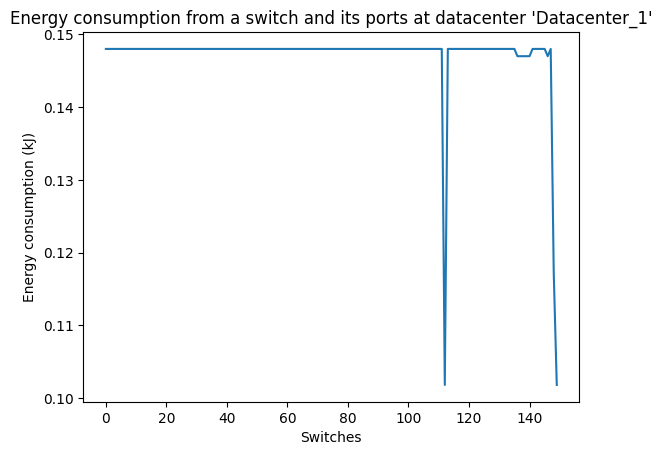

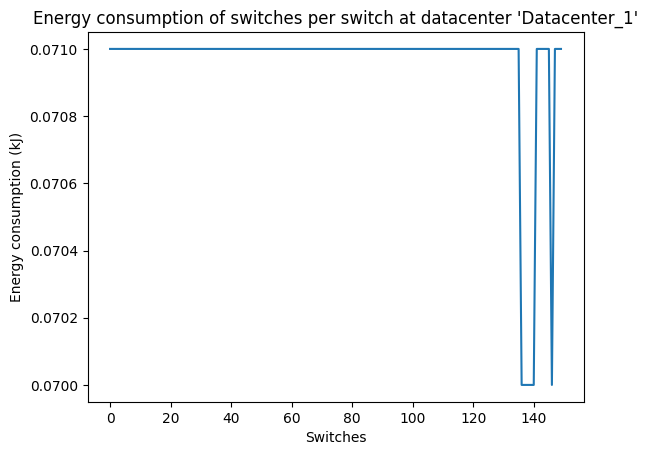

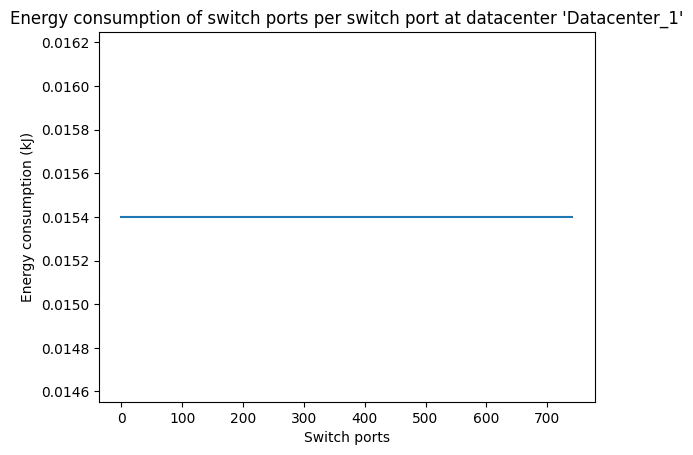

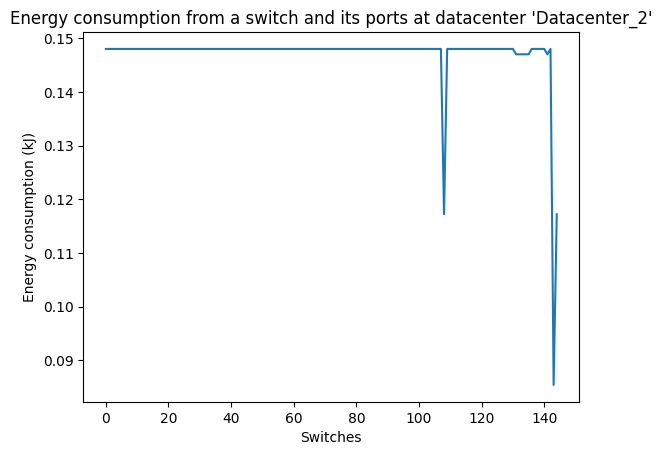

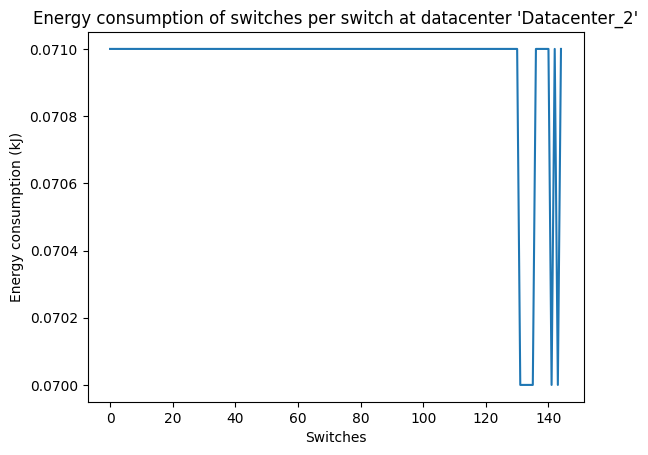

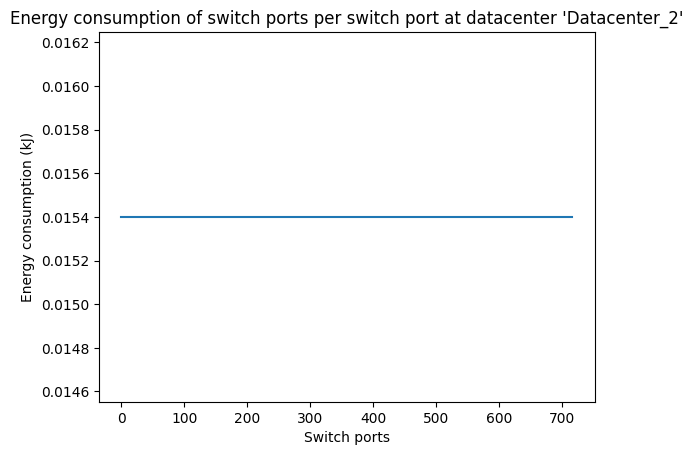

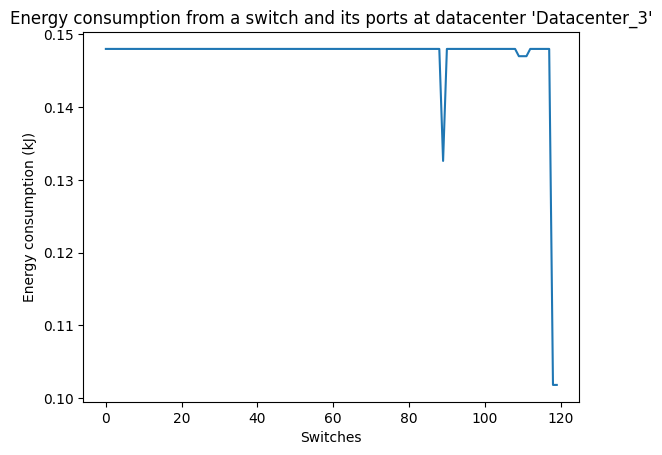

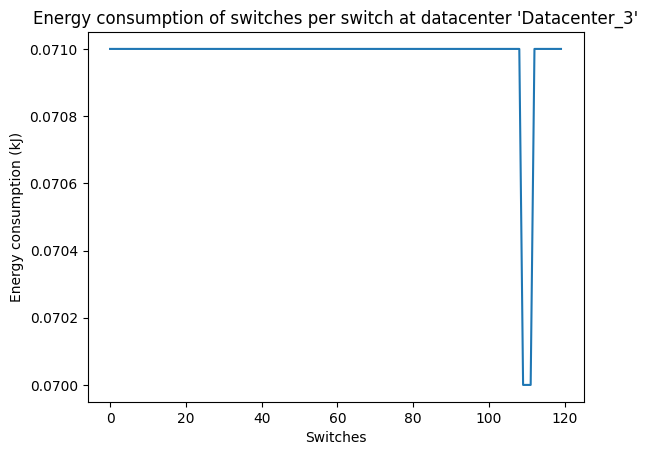

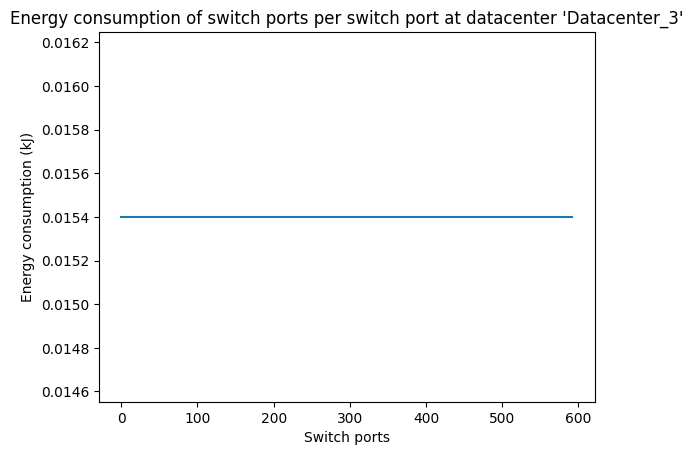

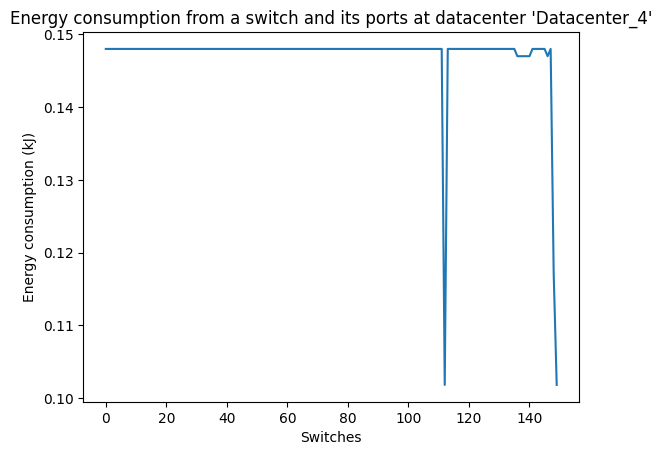

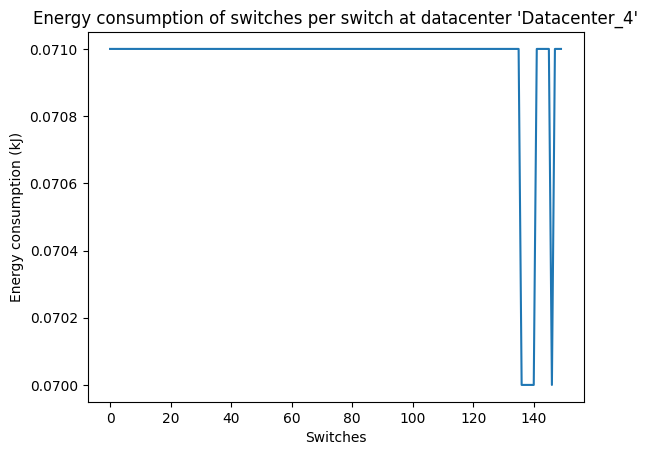

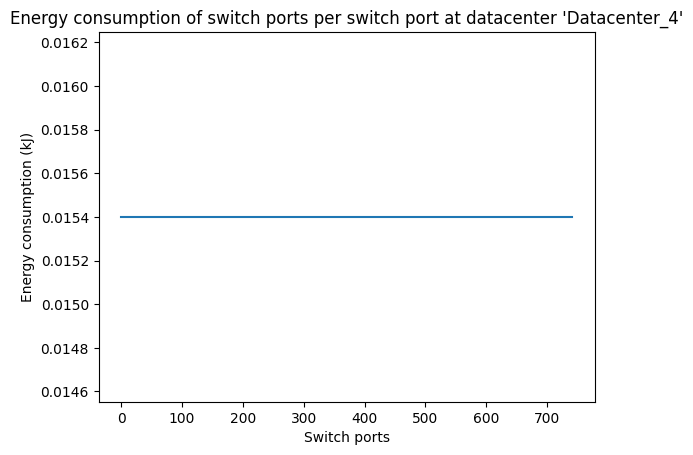

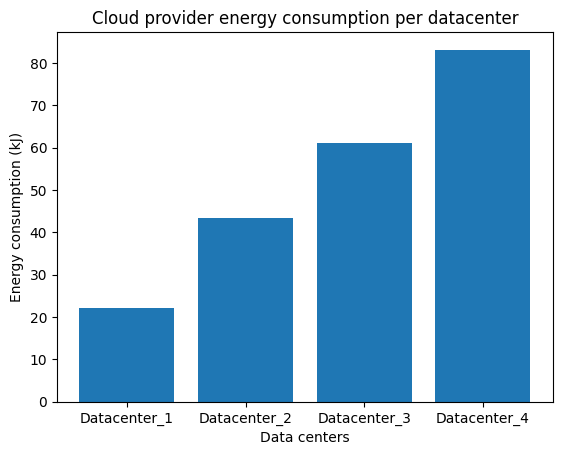

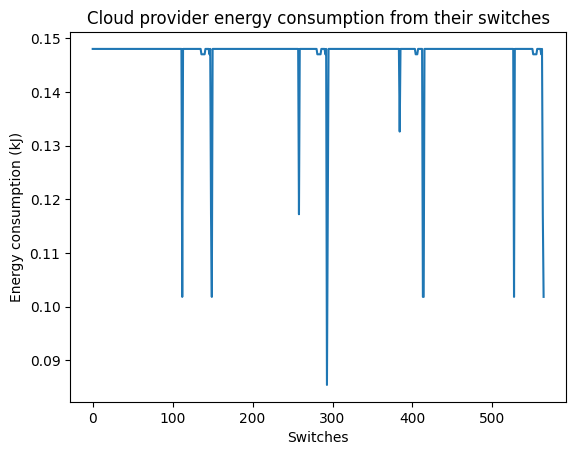

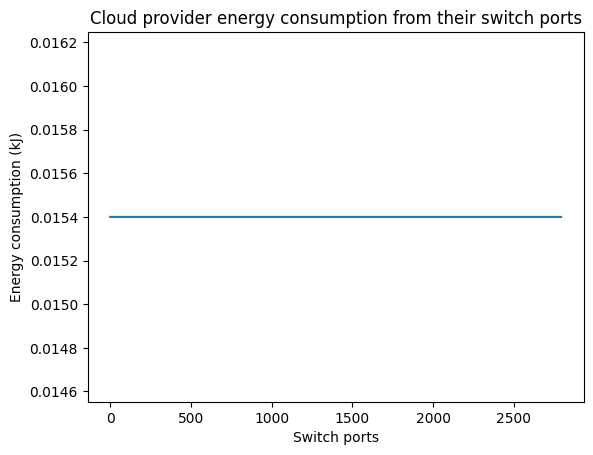

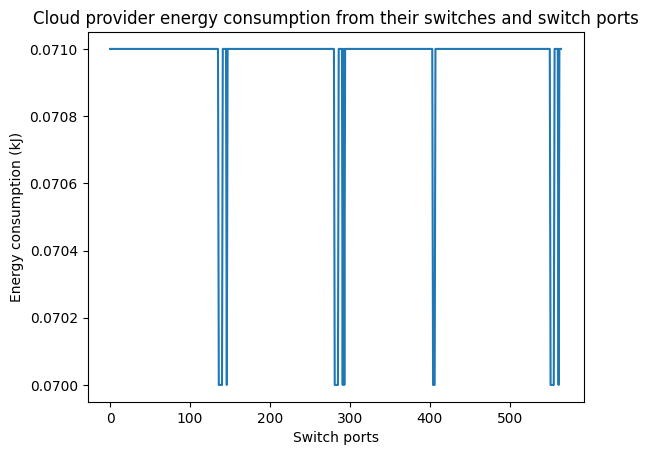

In [10]:
labels = np.unique(dataset['datacenter_name'])

cloud_provider_current_state_power_consumption_per_switch = np.array([])
cloud_provider_current_state_power_consumption_per_switch_port = np.array([])
cloud_provider_current_state_power_consumption_per_switch_combined = np.array([])
cloud_provider_current_state_power_consumption_per_datacenter = np.array([])
for datacenter_name in labels:
    datacenter_current_state_power_consumption_per_switch = np.array([])
    datacenter_current_state_power_consumption_per_switch_port = np.array([])
    datacenter_current_state_power_consumption_per_switch_combined = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        
        if sample['is_active'] == False:
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, 0)
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, 0)
        elif sample['total_used_bandwidth'] == 0:
            power_consumption += sample['low_power']
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, sample['low_power'])
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, sample['low_power'])
        else:
            power_consumption += sample['high_power']
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, sample['high_power'])
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, sample['high_power'])
        
        # ports: id, is_active, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if bool(port_info[1]):
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        power_consumption += power_per_port
                    else:
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, 0)
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, 0)
        
        cloud_provider_current_state_power_consumption_per_switch_combined = np.append(cloud_provider_current_state_power_consumption_per_switch_combined, power_consumption)
        datacenter_current_state_power_consumption_per_switch_combined = np.append(datacenter_current_state_power_consumption_per_switch_combined, power_consumption)
    cloud_provider_current_state_power_consumption_per_datacenter = np.append(cloud_provider_current_state_power_consumption_per_datacenter, np.sum(cloud_provider_current_state_power_consumption_per_switch_combined))
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_combined)), (datacenter_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch)), (datacenter_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_port)), (datacenter_current_state_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), (cloud_provider_current_state_power_consumption_per_datacenter / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_combined)), (cloud_provider_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_port)), (cloud_provider_current_state_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch)), (cloud_provider_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

##### Current network infrastructure energy consumption over the simulation duration

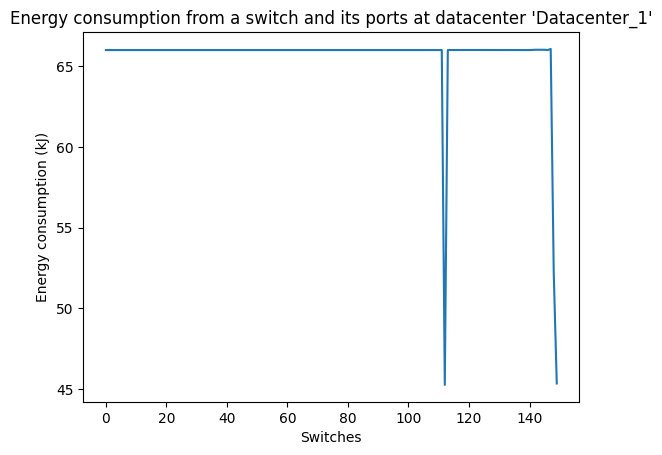

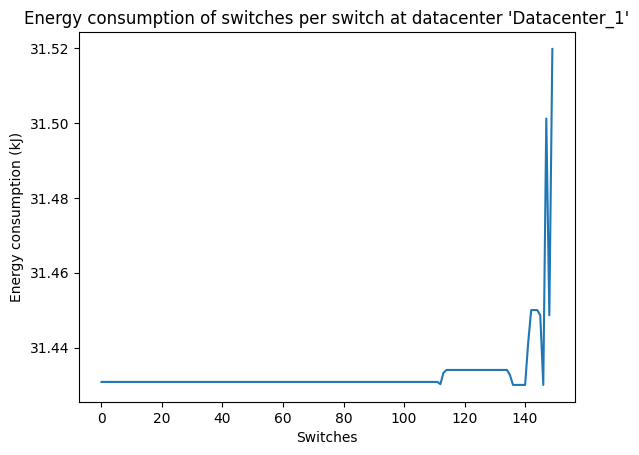

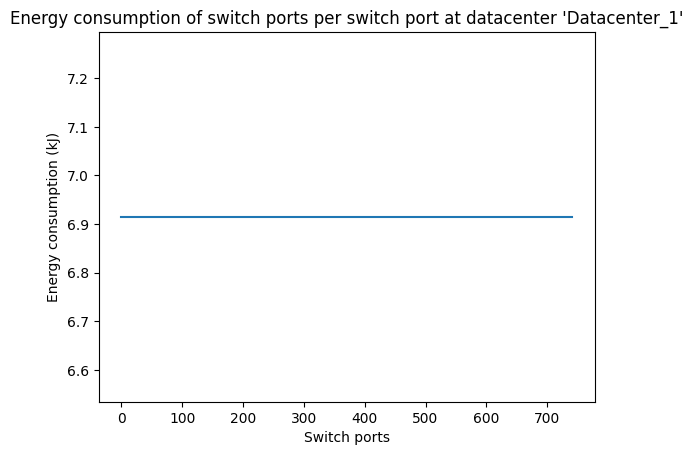

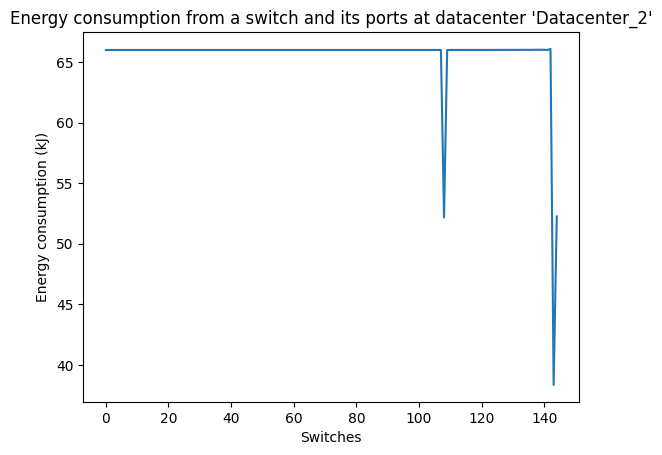

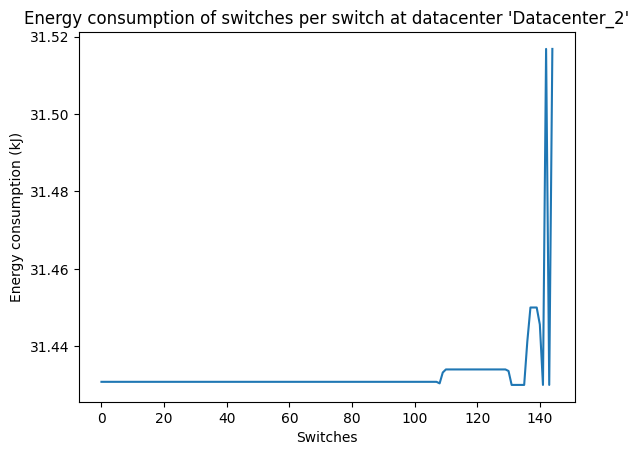

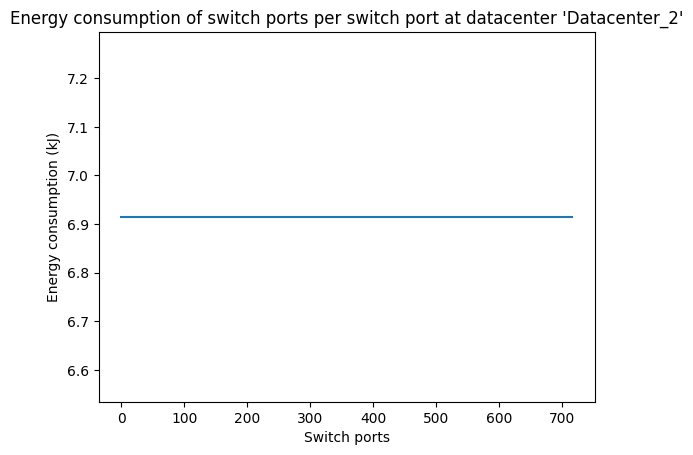

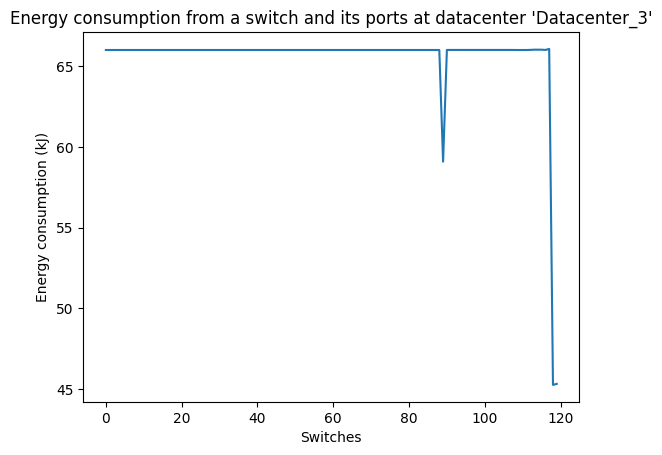

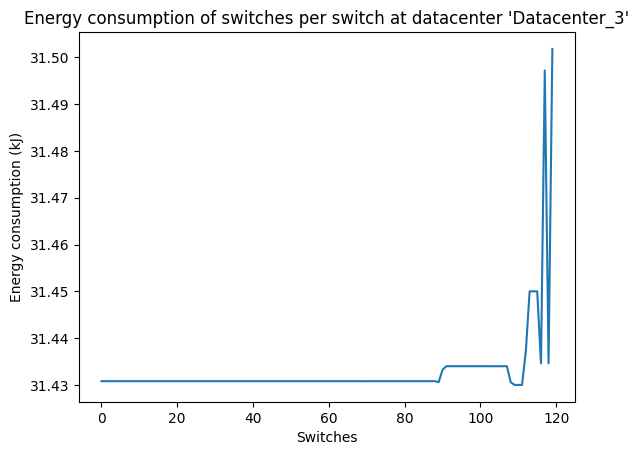

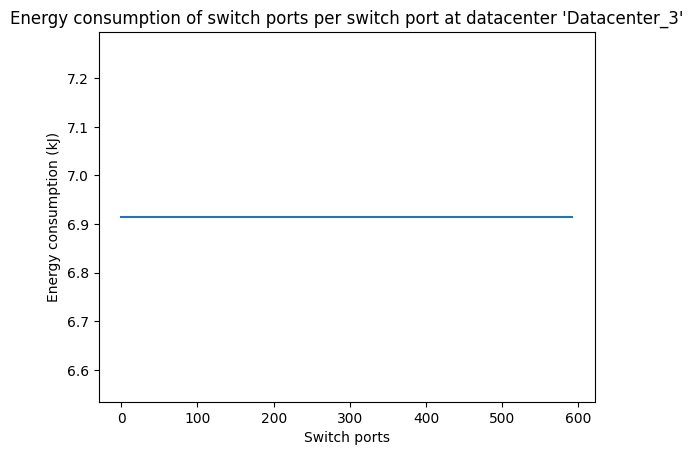

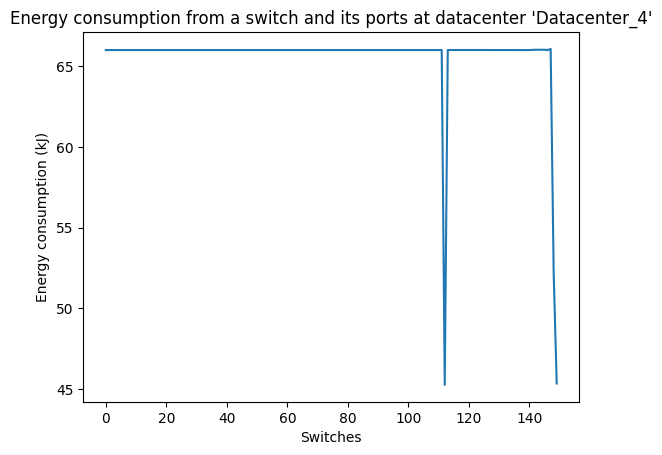

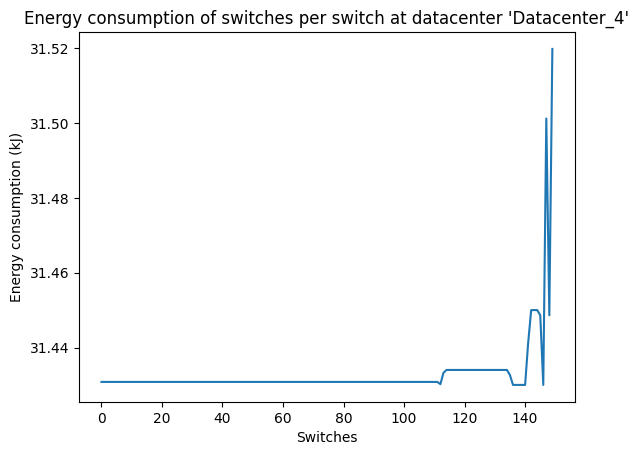

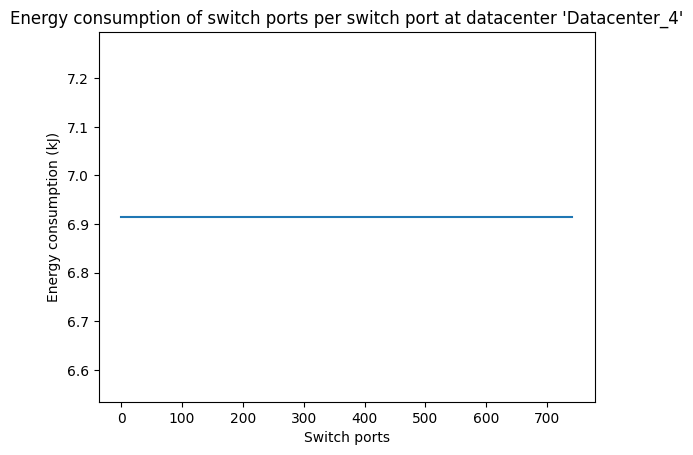

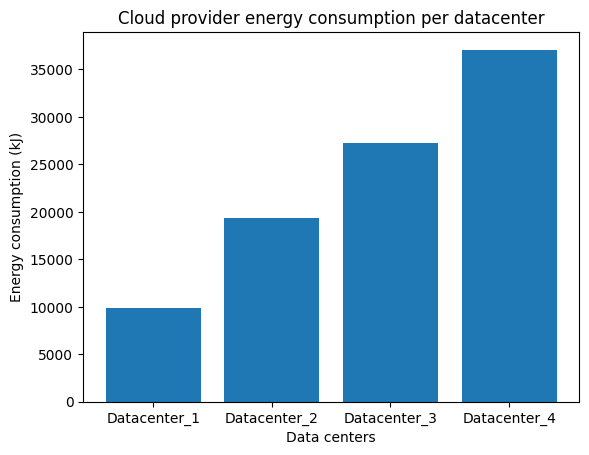

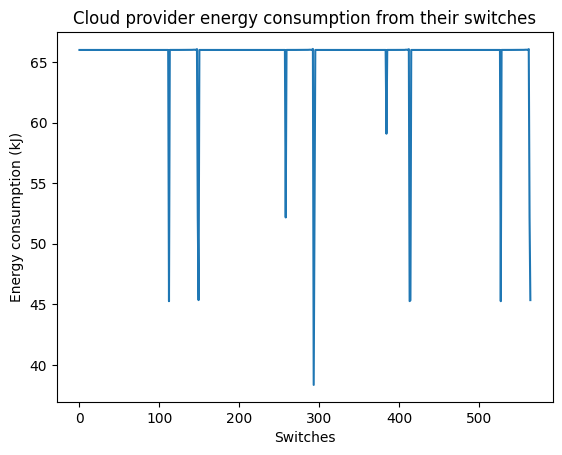

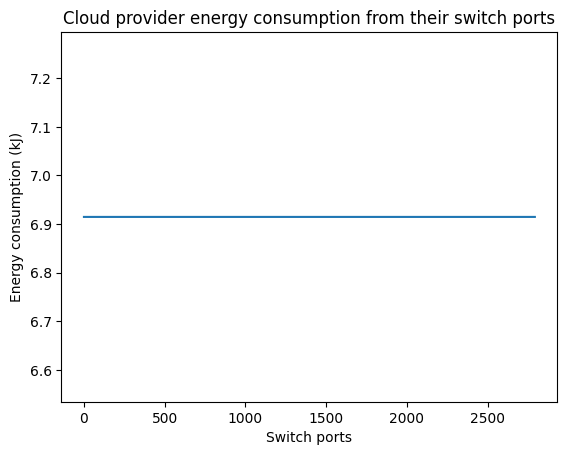

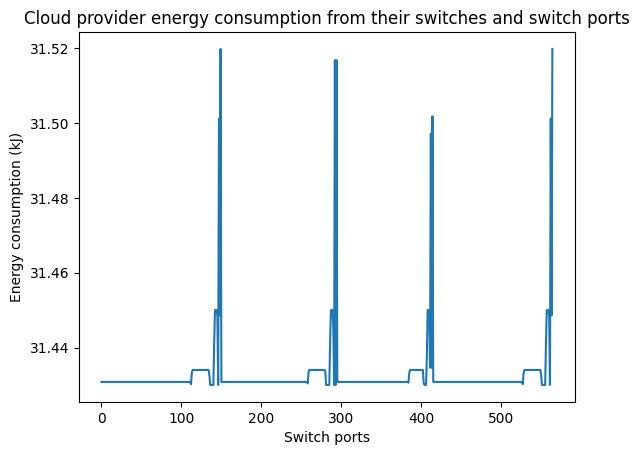

In [11]:
labels = np.unique(dataset['datacenter_name'])
simulation_duration = dataset['duration'][0]

cloud_provider_current_over_duration_power_consumption_per_switch = np.array([])
cloud_provider_current_over_duration_power_consumption_per_switch_port = np.array([])
cloud_provider_current_over_duration_power_consumption_per_switch_combined = np.array([])
cloud_provider_current_over_duration_power_consumption_per_datacenter = np.array([])
for datacenter_name in labels:
    datacenter_current_over_duration_power_consumption_per_switch = np.array([])
    datacenter_current_over_duration_power_consumption_per_switch_port = np.array([])
    datacenter_current_over_duration_power_consumption_per_switch_combined = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        
        if sample['is_active'] == False:
            cloud_provider_current_over_duration_power_consumption_per_switch = np.append(cloud_provider_current_over_duration_power_consumption_per_switch, 0)
            datacenter_current_over_duration_power_consumption_per_switch = np.append(datacenter_current_over_duration_power_consumption_per_switch, 0)
        else:
            device_power = ((simulation_duration - sample['active_duration']) * sample['low_power']) + (sample['active_duration'] * sample['high_power'])
            power_consumption += device_power
            cloud_provider_current_over_duration_power_consumption_per_switch = np.append(cloud_provider_current_over_duration_power_consumption_per_switch, device_power)
            datacenter_current_over_duration_power_consumption_per_switch = np.append(datacenter_current_over_duration_power_consumption_per_switch, device_power)
        
        # elif sample['total_used_bandwidth'] == 0:
        #     power_consumption += sample['low_power']
        #     cloud_provider_current_over_duration_power_consumption_per_switch = np.append(cloud_provider_current_over_duration_power_consumption_per_switch, sample['low_power'])
        #     datacenter_current_over_duration_power_consumption_per_switch = np.append(datacenter_current_over_duration_power_consumption_per_switch, sample['low_power'])
        # else:
        #     power_consumption += sample['high_power']
        #     cloud_provider_current_over_duration_power_consumption_per_switch = np.append(cloud_provider_current_over_duration_power_consumption_per_switch, sample['high_power'])
        #     datacenter_current_over_duration_power_consumption_per_switch = np.append(datacenter_current_over_duration_power_consumption_per_switch, sample['high_power'])
        
        # ports: id, is_active,active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if bool(port_info[1]):
                        port_power = sample['power_per_port'] * simulation_duration
                        cloud_provider_current_over_duration_power_consumption_per_switch_port = np.append(cloud_provider_current_over_duration_power_consumption_per_switch_port, port_power)
                        datacenter_current_over_duration_power_consumption_per_switch_port = np.append(datacenter_current_over_duration_power_consumption_per_switch_port, port_power)
                        power_consumption += port_power
                    else:
                        cloud_provider_current_over_duration_power_consumption_per_switch_port = np.append(cloud_provider_current_over_duration_power_consumption_per_switch_port, 0)
                        datacenter_current_over_duration_power_consumption_per_switch_port = np.append(datacenter_current_over_duration_power_consumption_per_switch_port, 0)
        
        cloud_provider_current_over_duration_power_consumption_per_switch_combined = np.append(cloud_provider_current_over_duration_power_consumption_per_switch_combined, power_consumption)
        datacenter_current_over_duration_power_consumption_per_switch_combined = np.append(datacenter_current_over_duration_power_consumption_per_switch_combined, power_consumption)
    cloud_provider_current_over_duration_power_consumption_per_datacenter = np.append(cloud_provider_current_over_duration_power_consumption_per_datacenter, np.sum(cloud_provider_current_over_duration_power_consumption_per_switch_combined))
    
    plt.plot(np.arange(len(datacenter_current_over_duration_power_consumption_per_switch_combined)), (datacenter_current_over_duration_power_consumption_per_switch_combined / 1000), label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_over_duration_power_consumption_per_switch)), (datacenter_current_over_duration_power_consumption_per_switch / 1000), label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_over_duration_power_consumption_per_switch_port)), (datacenter_current_over_duration_power_consumption_per_switch_port / 1000), label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_datacenter)), (cloud_provider_current_over_duration_power_consumption_per_datacenter / 1000), label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_switch_combined)), (cloud_provider_current_over_duration_power_consumption_per_switch_combined / 1000), label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_switch_port)), (cloud_provider_current_over_duration_power_consumption_per_switch_port / 1000), label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_switch)), (cloud_provider_current_over_duration_power_consumption_per_switch / 1000), label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

### Reducing Energy Consumption

Reducing energy consumption by powering down port

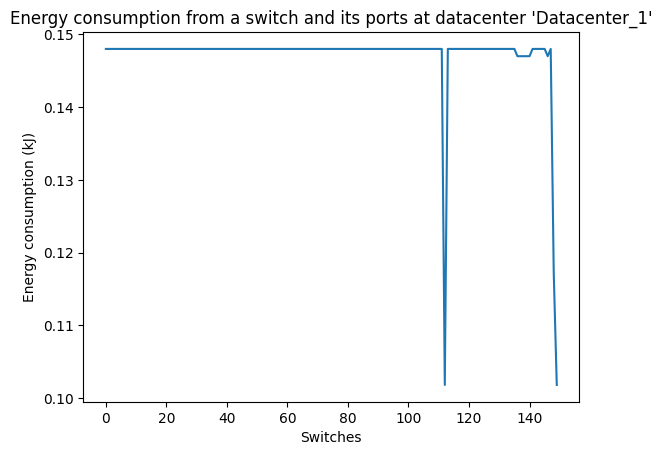

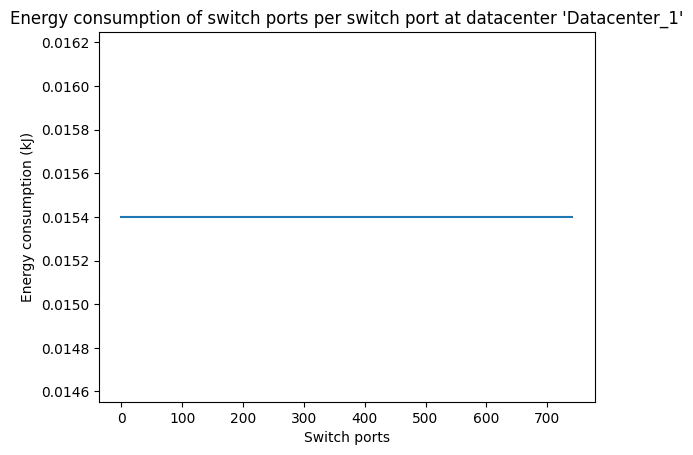

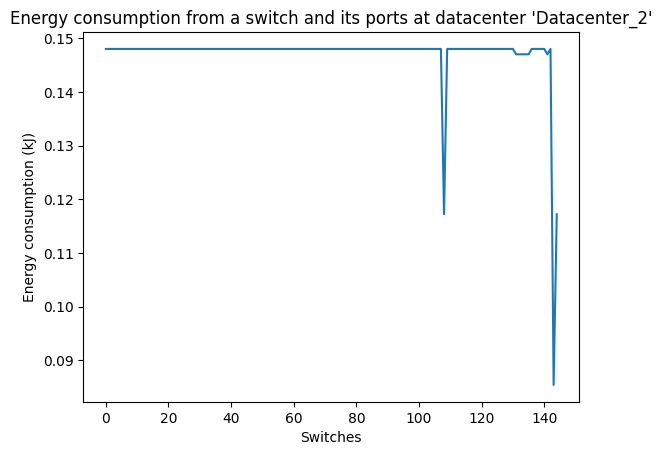

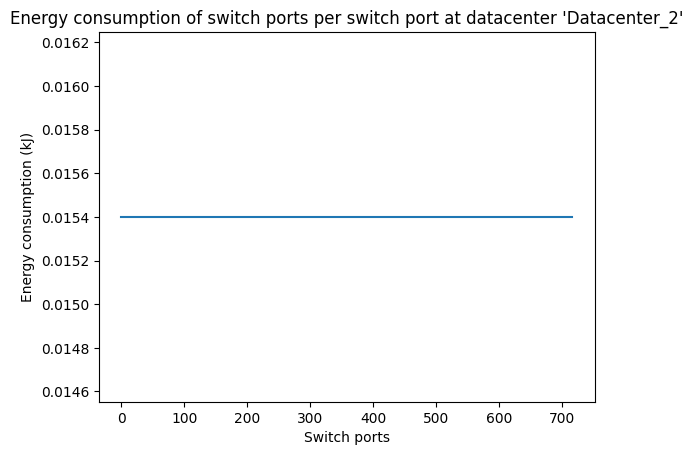

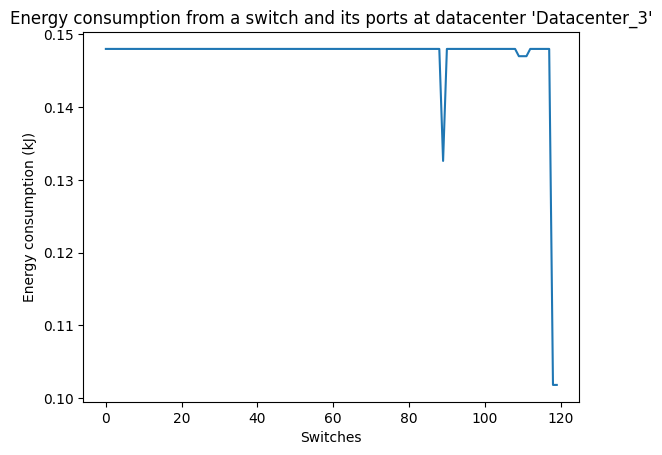

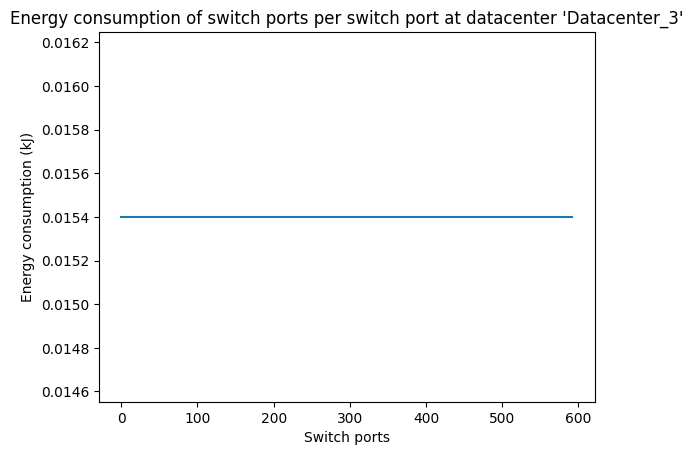

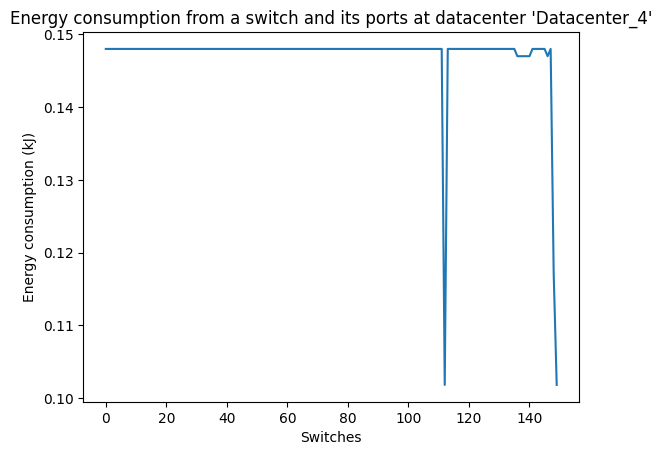

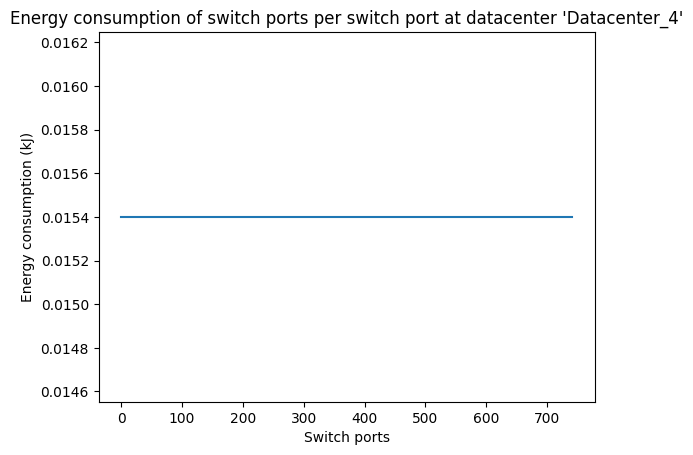

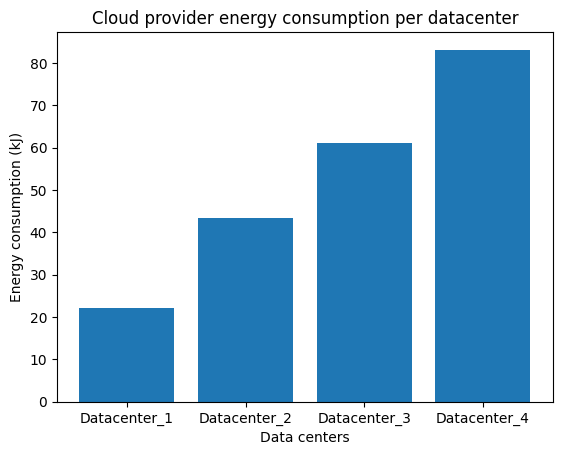

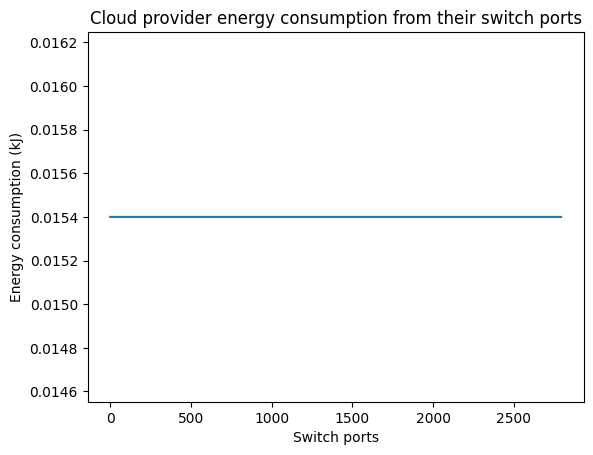

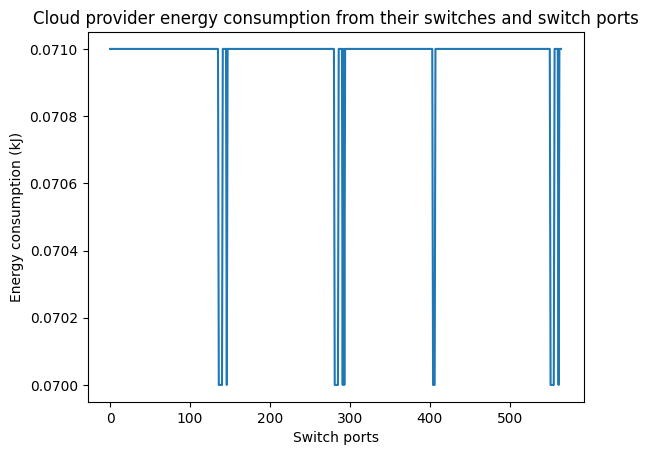

In [12]:
labels = np.unique(dataset['datacenter_name'])

cloud_provider_current_state_power_consumption_per_switch = np.array([])
cloud_provider_current_state_power_consumption_per_switch_port = np.array([])
cloud_provider_current_state_power_consumption_per_switch_combined = np.array([])
cloud_provider_current_state_power_consumption_per_datacenter = np.array([])
for datacenter_name in labels:
    datacenter_current_state_power_consumption_per_switch = np.array([])
    datacenter_current_state_power_consumption_per_switch_port = np.array([])
    datacenter_current_state_power_consumption_per_switch_combined = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        
        if sample['is_active'] == False:
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, 0)
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, 0)
        elif sample['total_used_bandwidth'] == 0:
            power_consumption += sample['low_power']
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, sample['low_power'])
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, sample['low_power'])
        else:
            power_consumption += sample['high_power']
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, sample['high_power'])
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, sample['high_power'])
        
        # If a port is unused rather than having still consume power when active it is powered down
        # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if bool(port_info[1]) and port_info[6] != 0:
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        power_consumption += power_per_port
                    else:
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, 0)
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, 0)
        
        cloud_provider_current_state_power_consumption_per_switch_combined = np.append(cloud_provider_current_state_power_consumption_per_switch_combined, power_consumption)
        datacenter_current_state_power_consumption_per_switch_combined = np.append(datacenter_current_state_power_consumption_per_switch_combined, power_consumption)
    cloud_provider_current_state_power_consumption_per_datacenter = np.append(cloud_provider_current_state_power_consumption_per_datacenter, np.sum(cloud_provider_current_state_power_consumption_per_switch_combined))
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_combined)), (datacenter_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_port)), (datacenter_current_state_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), (cloud_provider_current_state_power_consumption_per_datacenter / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_port)), (cloud_provider_current_state_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch)), (cloud_provider_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

Reducing energy consumption by power down switches

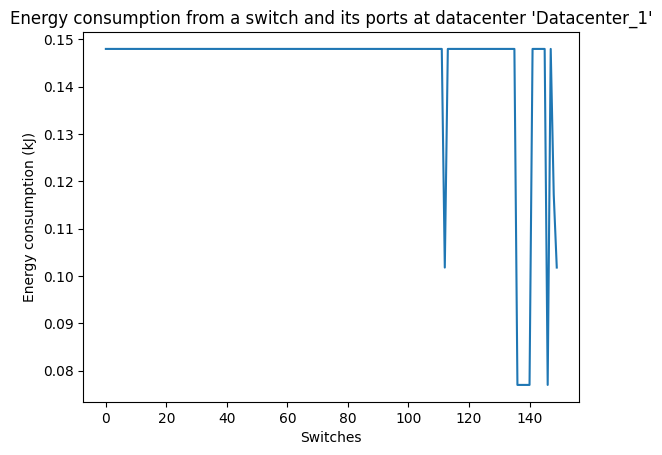

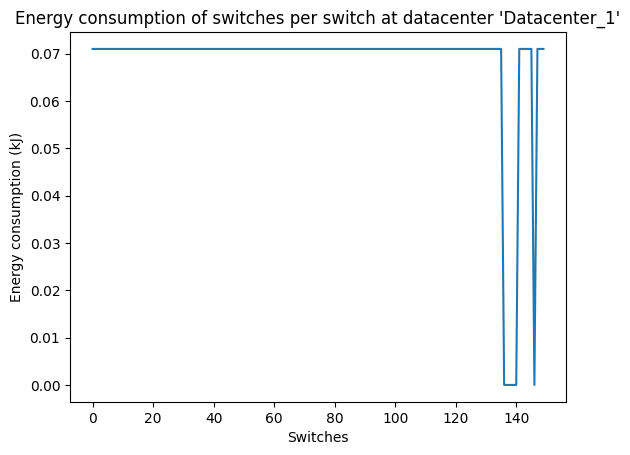

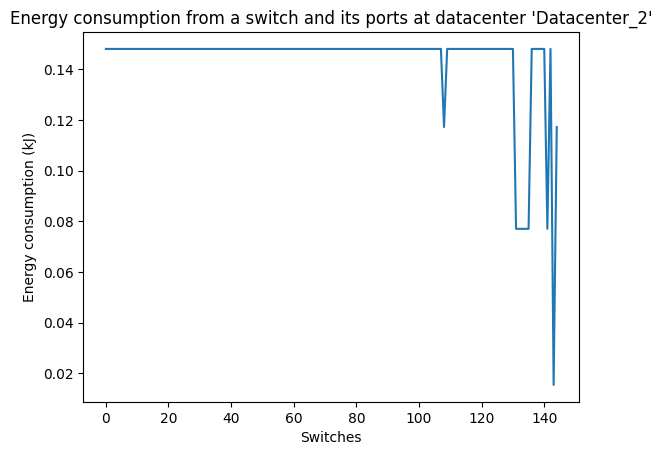

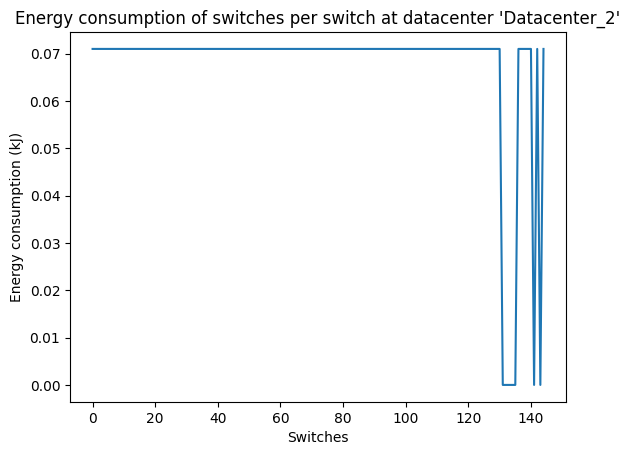

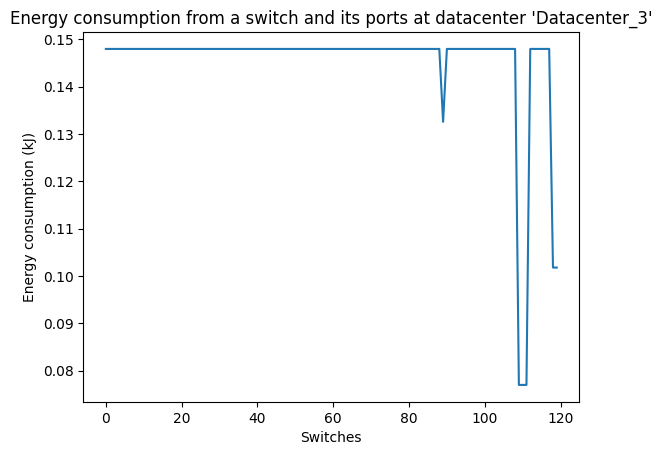

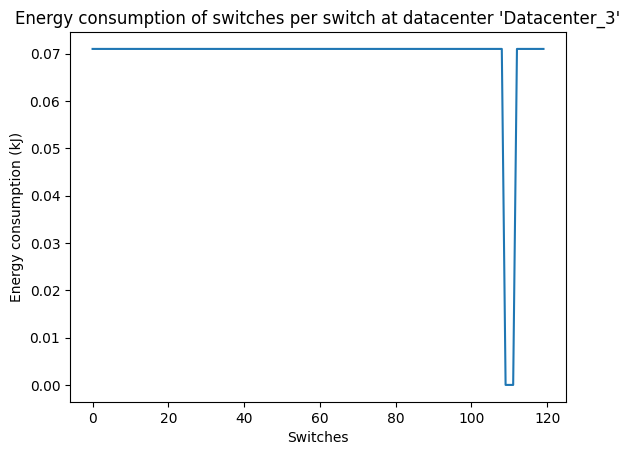

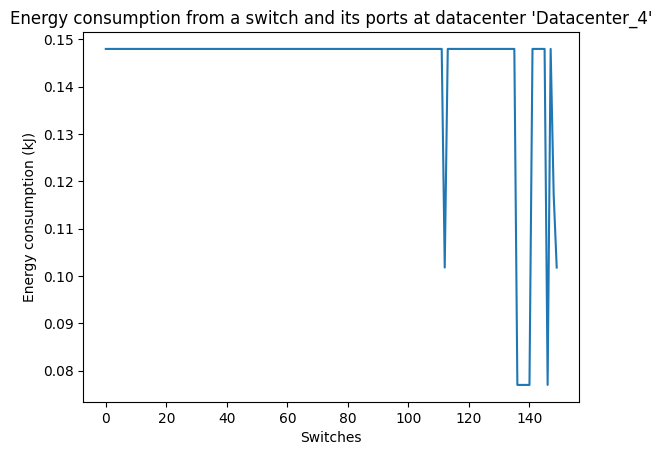

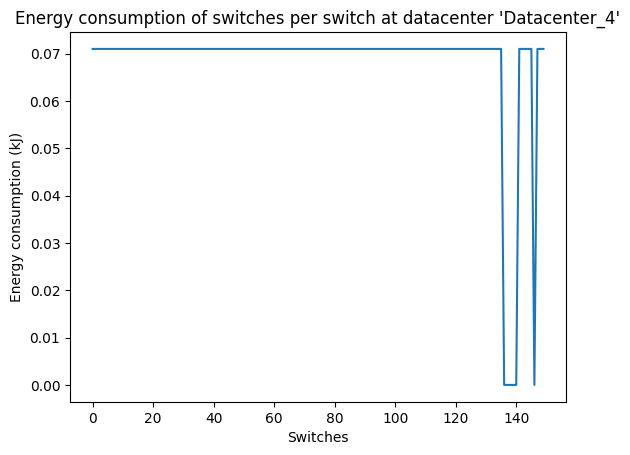

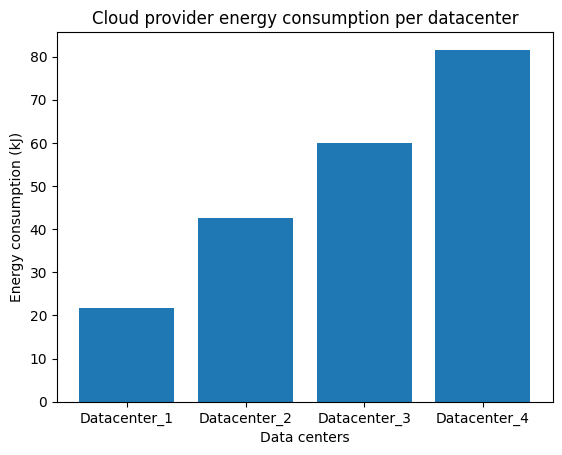

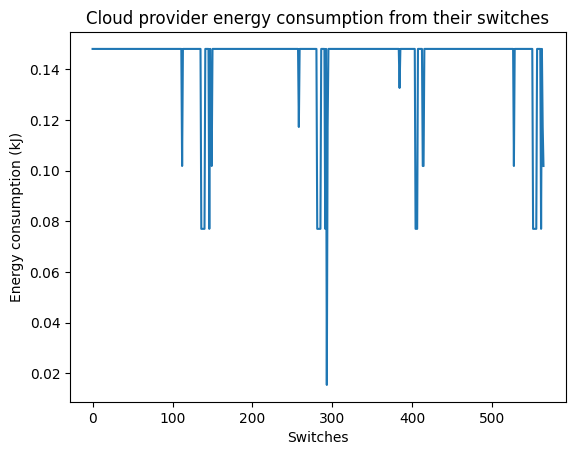

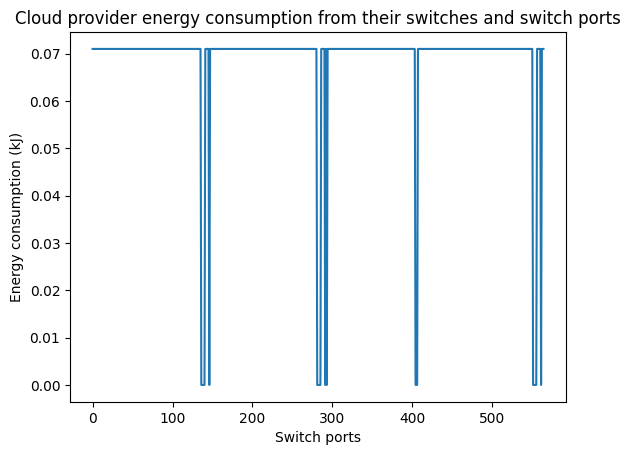

In [13]:
labels = np.unique(dataset['datacenter_name'])

cloud_provider_current_state_power_consumption_per_switch = np.array([])
cloud_provider_current_state_power_consumption_per_switch_port = np.array([])
cloud_provider_current_state_power_consumption_per_switch_combined = np.array([])
cloud_provider_current_state_power_consumption_per_datacenter = np.array([])
for datacenter_name in labels:
    datacenter_current_state_power_consumption_per_switch = np.array([])
    datacenter_current_state_power_consumption_per_switch_port = np.array([])
    datacenter_current_state_power_consumption_per_switch_combined = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        
        # If switch is unused rather than having it be idle when active it is powered down
        if sample['is_active'] == False or sample['total_used_bandwidth'] == 0:
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, 0)
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, 0)
        else:
            power_consumption += sample['high_power']
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, sample['high_power'])
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, sample['high_power'])
        
        # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if bool(port_info[1]):
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        power_consumption += power_per_port
                    else:
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, 0)
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, 0)
        
        cloud_provider_current_state_power_consumption_per_switch_combined = np.append(cloud_provider_current_state_power_consumption_per_switch_combined, power_consumption)
        datacenter_current_state_power_consumption_per_switch_combined = np.append(datacenter_current_state_power_consumption_per_switch_combined, power_consumption)
    cloud_provider_current_state_power_consumption_per_datacenter = np.append(cloud_provider_current_state_power_consumption_per_datacenter, np.sum(cloud_provider_current_state_power_consumption_per_switch_combined))
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_combined)), (datacenter_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch)), (datacenter_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), (cloud_provider_current_state_power_consumption_per_datacenter / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_combined)), (cloud_provider_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch)), (cloud_provider_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

Reducing energy consumption by powering down unused switches and ports.

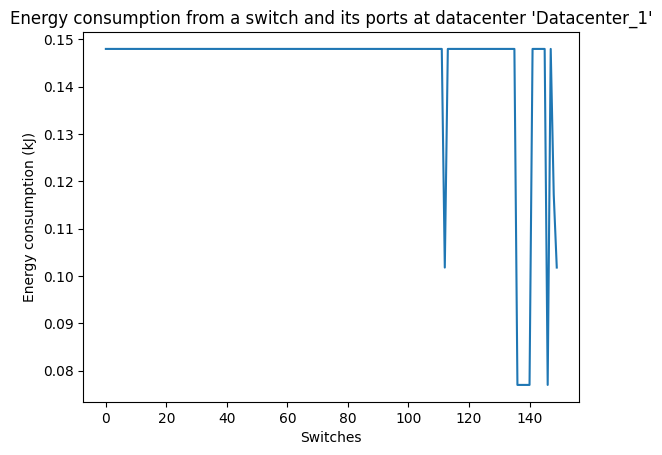

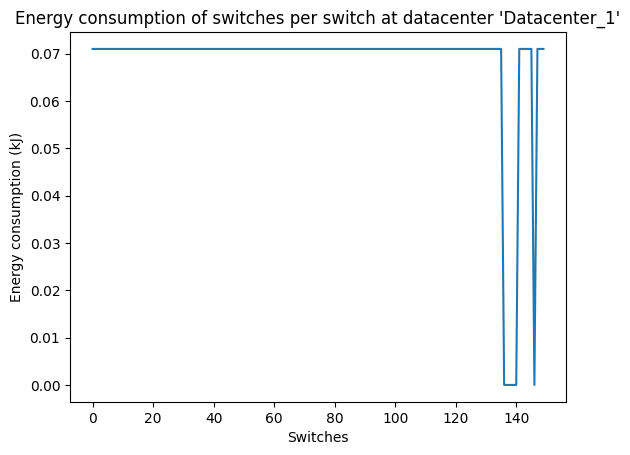

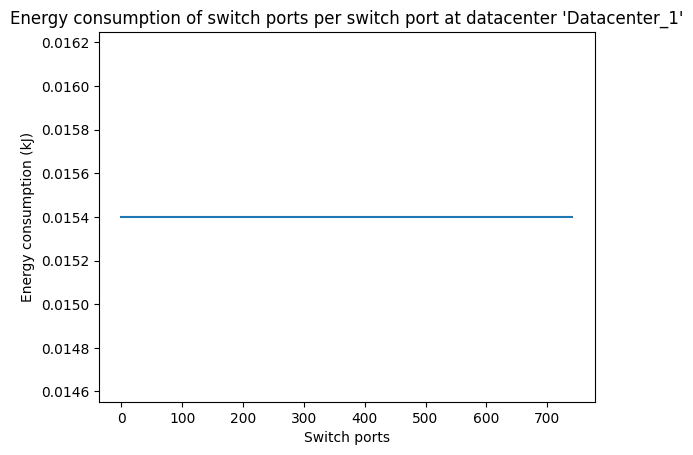

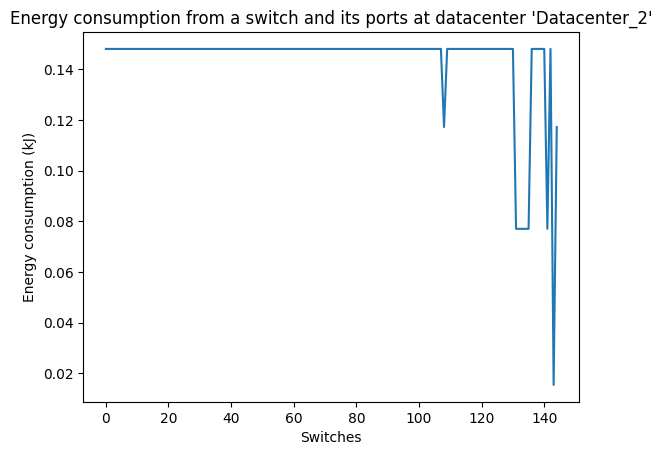

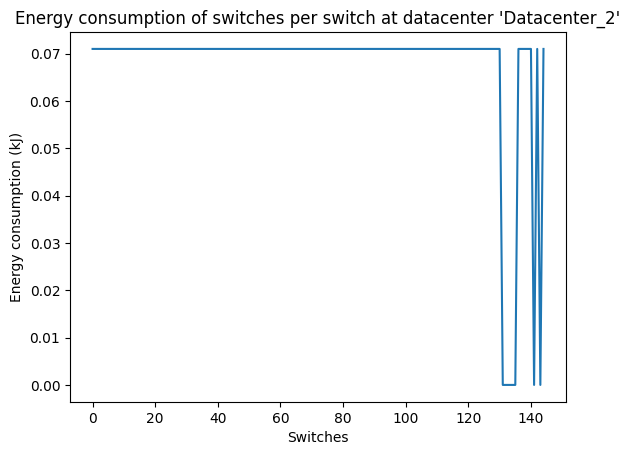

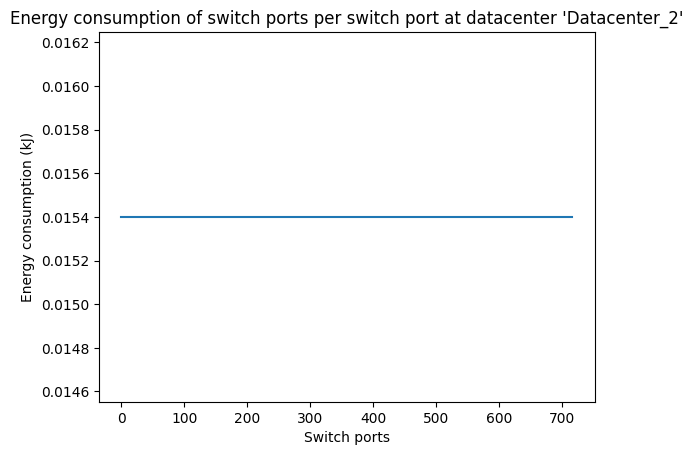

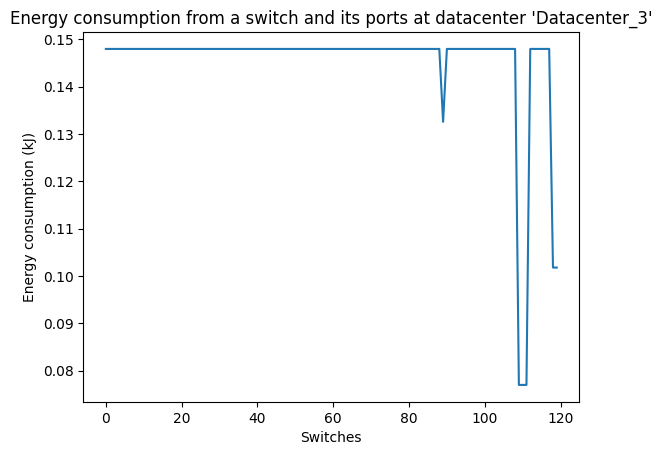

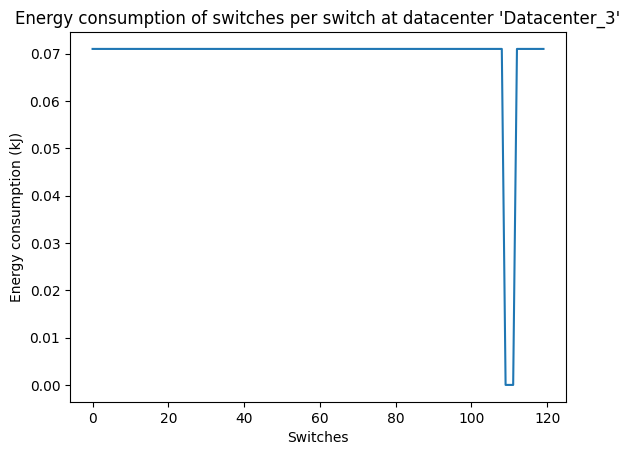

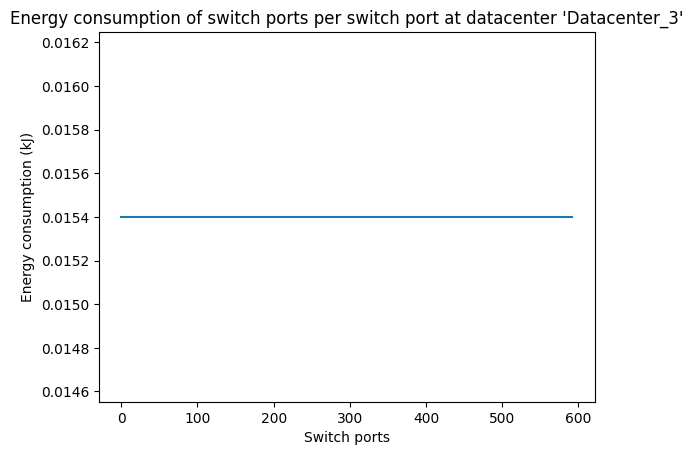

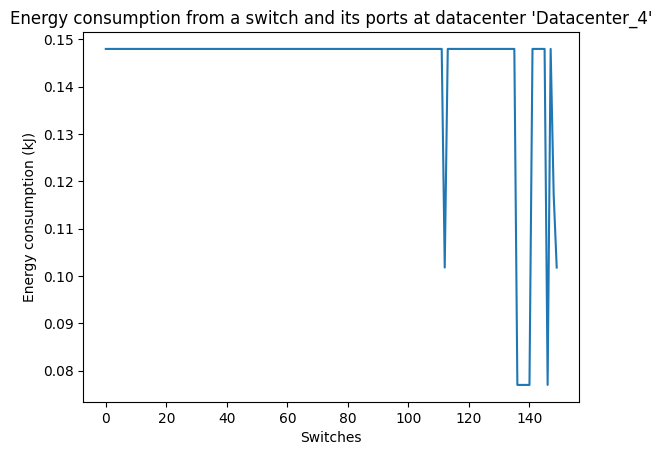

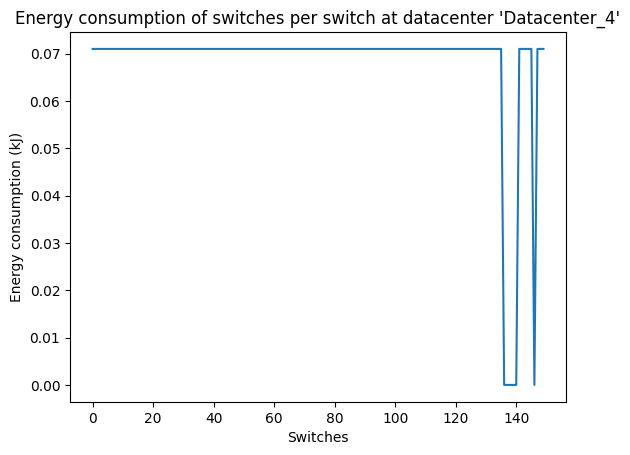

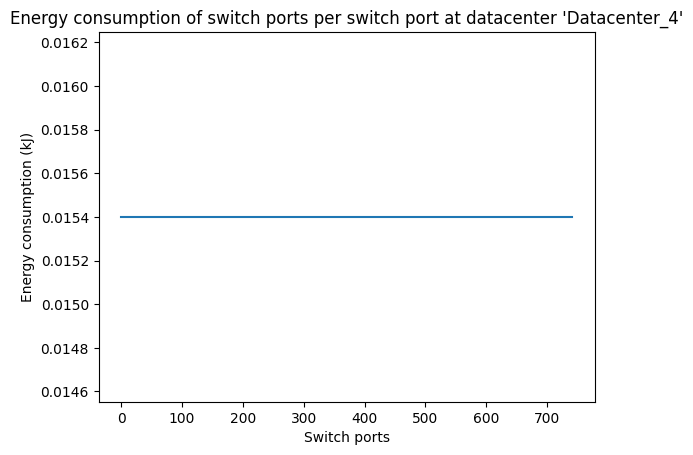

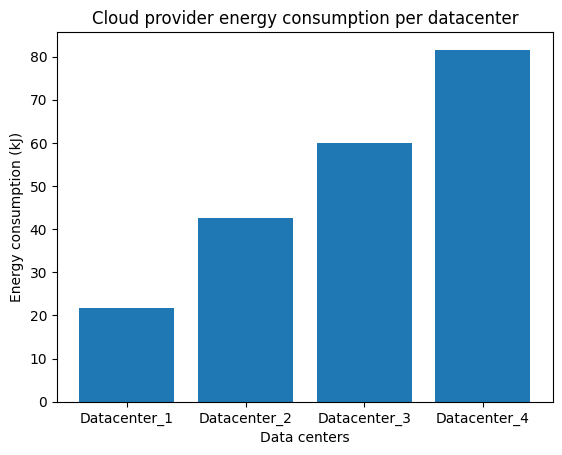

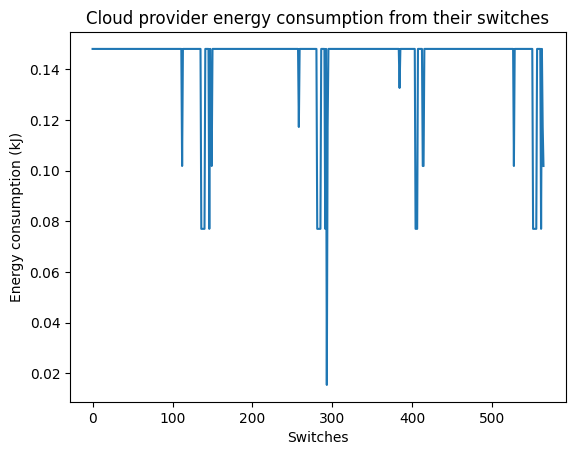

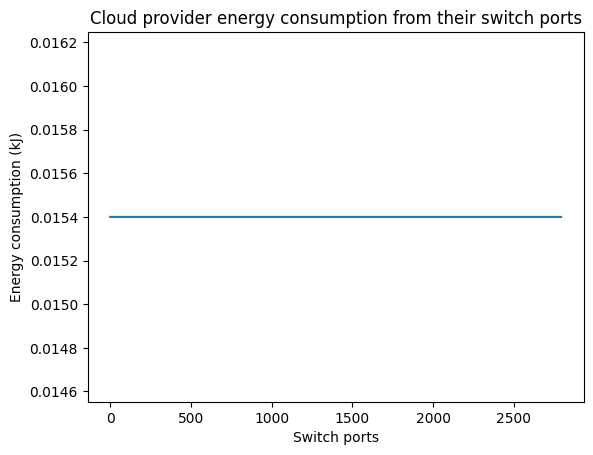

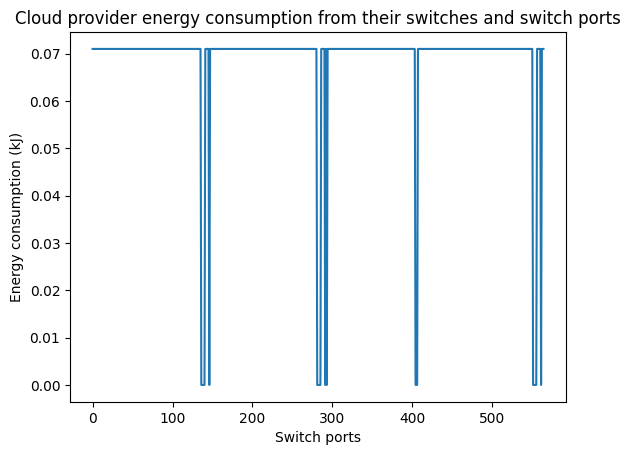

In [14]:
labels = np.unique(dataset['datacenter_name'])

cloud_provider_current_state_power_consumption_per_switch = np.array([])
cloud_provider_current_state_power_consumption_per_switch_port = np.array([])
cloud_provider_current_state_power_consumption_per_switch_combined = np.array([])
cloud_provider_current_state_power_consumption_per_datacenter = np.array([])
for datacenter_name in labels:
    datacenter_current_state_power_consumption_per_switch = np.array([])
    datacenter_current_state_power_consumption_per_switch_port = np.array([])
    datacenter_current_state_power_consumption_per_switch_combined = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        
        # If switch is unused rather than having it be idle when active it is powered down
        if sample['is_active'] == False or sample['total_used_bandwidth'] == 0:
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, 0)
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, 0)
        else:
            power_consumption += sample['high_power']
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, sample['high_power'])
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, sample['high_power'])
        
        # If a port is unused rather than having still consume power when active it is powered down
        # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if bool(port_info[1]) and port_info[6] != 0:
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        power_consumption += power_per_port
                    else:
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, 0)
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, 0)
        
        cloud_provider_current_state_power_consumption_per_switch_combined = np.append(cloud_provider_current_state_power_consumption_per_switch_combined, power_consumption)
        datacenter_current_state_power_consumption_per_switch_combined = np.append(datacenter_current_state_power_consumption_per_switch_combined, power_consumption)
    cloud_provider_current_state_power_consumption_per_datacenter = np.append(cloud_provider_current_state_power_consumption_per_datacenter, np.sum(cloud_provider_current_state_power_consumption_per_switch_combined))
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_combined)), (datacenter_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch)), (datacenter_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_port)), (datacenter_current_state_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), (cloud_provider_current_state_power_consumption_per_datacenter / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_combined)), (cloud_provider_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_port)), (cloud_provider_current_state_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch)), (cloud_provider_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

### Combine and Compare methods of reducing energy consumption